# IMPORT LIBRARIES

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# IMPORT DATASETS

In [34]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [35]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [2]:
train_df.describe()

NameError: name 'train_df' is not defined

In [37]:
train_df.loc[(train_df["Sodium"] > train_df["Sodium"].quantile(0.75)) & (train_df["Alkalinity, total"] > train_df["Alkalinity, total"].mean())]["Hardness"].mean()

383.0833134765625

{'whiskers': [<matplotlib.lines.Line2D at 0x214d9ac29b0>,
 'caps': [<matplotlib.lines.Line2D at 0x214d9ac3370>,
 'boxes': [<matplotlib.lines.Line2D at 0x214d9ac1d20>],
 'medians': [<matplotlib.lines.Line2D at 0x214d9ac3d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x214d9ac3ca0>],
 'means': []}

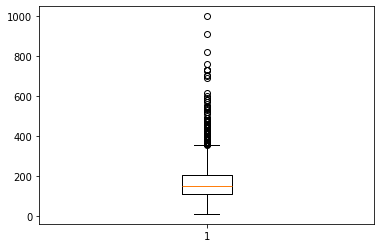

In [38]:
plt.boxplot(train_df["Alkalinity, total"])

In [1]:
def detect_outliers_stddev(data, threshold=1.5):
    outliers_mask = abs(data - data.mean()) > threshold * data.std()
    print(f"data mean: {data.mean()}")
    print(f"data std: {data.std()}")
    return outliers_mask

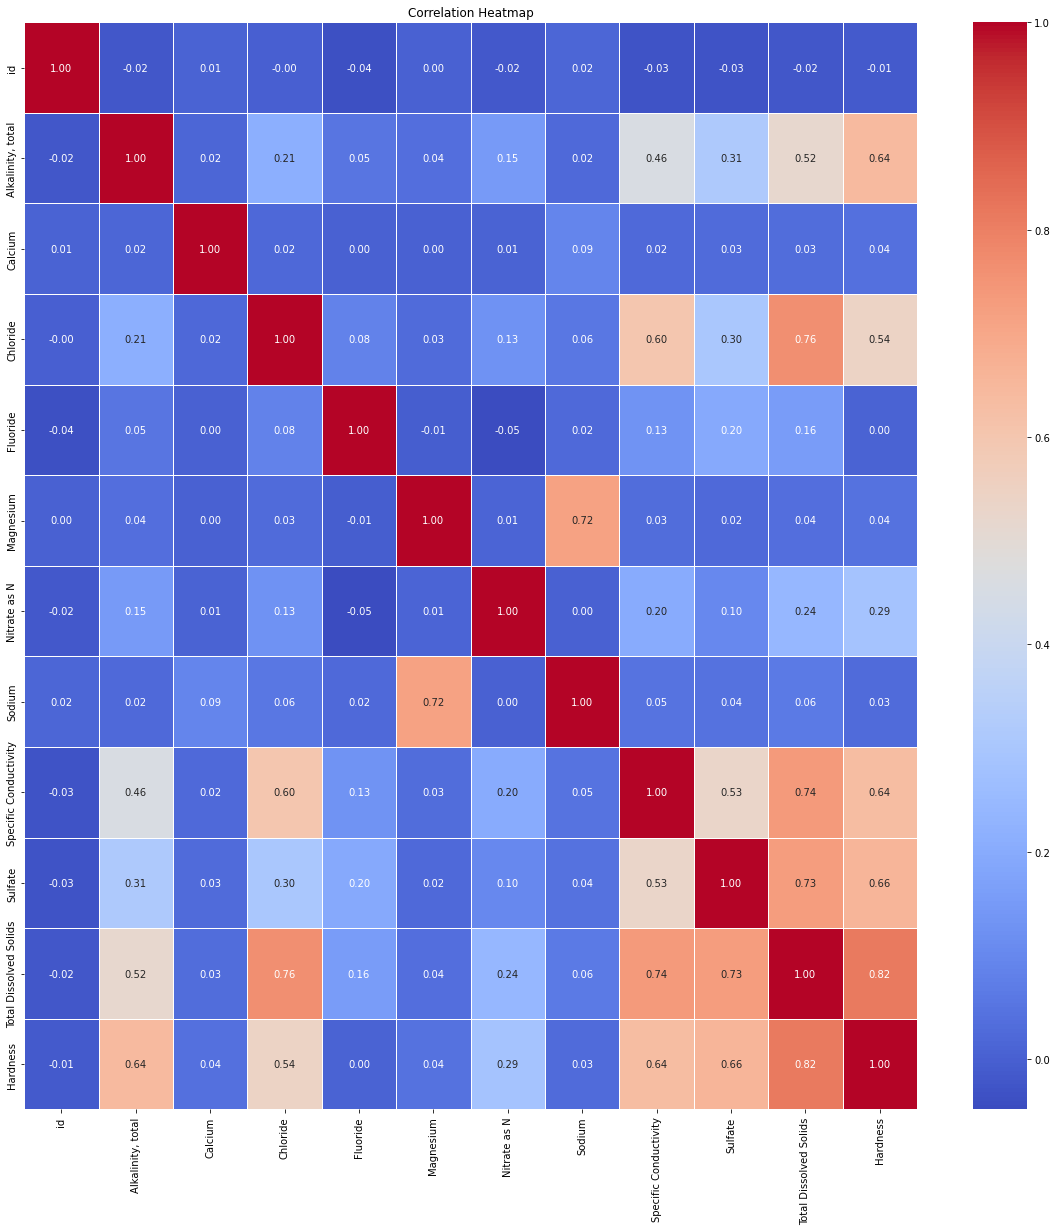

In [40]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

data mean: Alkalinity, total          167.151047
Calcium                     69.350432
Chloride                    53.213620
Fluoride                     0.333625
Hardness                   216.148203
Magnesium                   23.446335
Nitrate as N                 3.382707
Sodium                      62.437731
Specific Conductivity      637.631953
Sulfate                     71.645934
Total Dissolved Solids     409.570669
id                        3199.500000
dtype: float64
data std: Alkalinity, total           83.157803
Calcium                   1052.136452
Chloride                    92.934505
Fluoride                     0.452473
Hardness                   161.431526
Magnesium                  325.389503
Nitrate as N                 4.878279
Sodium                     556.891904
Specific Conductivity      597.297274
Sulfate                    108.414049
Total Dissolved Solids     302.958442
id                        1847.665193
dtype: float64
Outliers in every column: 
id        

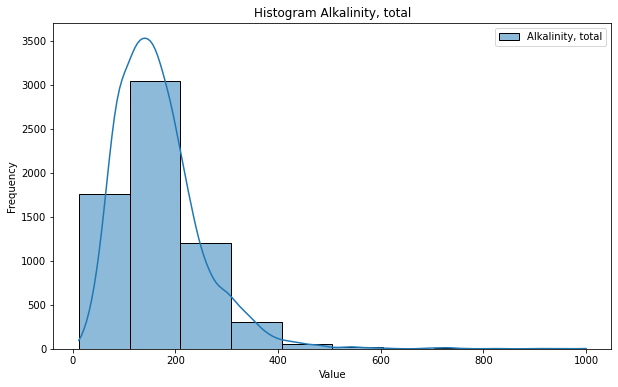

In [41]:
outliers_mask = detect_outliers_stddev(train_df[train_df.select_dtypes(include=["number"]).columns.difference(["keluhan", "jumlah_promosi"])])
outlier_values = train_df[outliers_mask]
print("Outliers in every column: ")
print(outlier_values.count())
print("Histogram of most skewed column")
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(train_df["Alkalinity, total"], bins=10, kde=True, label="Alkalinity, total", alpha=0.5)

plt.xlabel('Value')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Histogram Alkalinity, total')  # Set title
plt.legend()  # Show legend
plt.show()

# train_df = train_df[~outliers_mask.any(axis=1)]

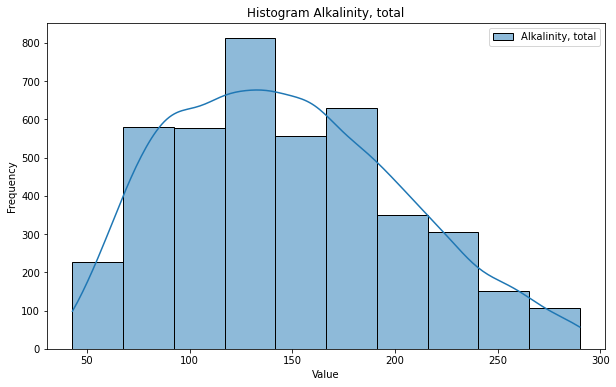

In [42]:
train_df = train_df[~outliers_mask.any(axis=1)]

plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(train_df["Alkalinity, total"], bins=10, kde=True, label="Alkalinity, total", alpha=0.5)

plt.xlabel('Value')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Histogram Alkalinity, total')  # Set title
plt.legend()  # Show legend
plt.show()